# **Introduction**
This notebok presents a complete ML project inclusing below steps:
1.   Data understanding
2.   Data preprocessing
3.   Feature engineering
4.   Model selection
5.   Model deployement

The objective is to predict the probability of default of business loan applicants.

# **Importing libraries and train data**

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [ ]:
# Import train data
data_train = pd.read_excel('/DSC2020_Training.xlsx', index_col='LoanID')

In [ ]:
# detailes and charachteristics of data columns:
# number of non-null values per column and type of data in every column
# "object" Dtype means non-numerical data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26962 entries, 1 to 26962
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Type                                   26962 non-null  object 
 1   INDUSTRY_CD_3                          26962 non-null  int64  
 2   INDUSTRY_CD_4                          26962 non-null  int64  
 3   BEH_SCORE_AVG_A1                       16027 non-null  float64
 4   BEH_SCORE_AVG_A2                       16266 non-null  float64
 5   BEH_SCORE_MIN_A2                       16266 non-null  float64
 6   FHS_SCORE_AVG                          20688 non-null  float64
 7   FHS_SCORE_LATEST                       20621 non-null  float64
 8   CASH_FLOW_AMT                          20737 non-null  float64
 9   FREE_CASH_FLOW_AMT                     86 non-null     float64
 10  MTHS_SNC_1ST_REC_CNT                   26773 non-null  float64
 11  Ma

In [ ]:
# the list of columns below are integer value codes but they should not be 
# considered as numerical variables, so they are transformed to strings

transform_str_list = ['INDUSTRY_CD_3', 'INDUSTRY_CD_4', 'A2_MARITAL_STATUS_CD', 
                      'ACCOUNT_PURPOSE_CD', 'A2_EMPLOYMENT_STATUS_CD', 'A2_RESIDENT_STATUS_CD']

data_train[transform_str_list] = data_train[transform_str_list].astype(str)

# For retun the possible missing data in these columns
data_train.replace(to_replace='nan', value=np.nan, inplace=True)

In [ ]:
# determining the target variable and features columns
target_col = 'Label_Default'
feature_cols = data_train.columns.drop('Label_Default')

Y = data_train[target_col].copy()
# In target variable, replace Y with 1 and N with 0
Y.replace({'Y':1, 'N':0}, inplace=True)

X = data_train[feature_cols].copy()

# determining which variables are numerical and which are categorical
num_cols = data_train[feature_cols].select_dtypes(exclude='object').columns
cat_cols = data_train[feature_cols].select_dtypes(include='object').columns

In [ ]:
# Summary statistics for numerical features
data_train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
BEH_SCORE_AVG_A1,16027.0,649.449859,45.777164,0.000000e+00,627.000000,654.000000,677.000000,7.570000e+02
BEH_SCORE_AVG_A2,16266.0,667.979918,37.059500,0.000000e+00,650.000000,676.000000,693.636880,7.570000e+02
BEH_SCORE_MIN_A2,16266.0,654.969877,43.507769,0.000000e+00,633.000000,665.000000,688.097402,7.570000e+02
FHS_SCORE_AVG,20688.0,98.046445,4.131621,0.000000e+00,97.935418,98.776561,99.551346,1.000000e+02
FHS_SCORE_LATEST,20621.0,98.051922,4.203183,0.000000e+00,97.833606,98.781982,99.668726,1.000000e+02
CASH_FLOW_AMT,20737.0,36693.002604,56340.009716,-2.650520e+05,10244.000000,22042.000000,44981.000000,1.989650e+06
FREE_CASH_FLOW_AMT,86.0,-2565.883721,150439.777025,-1.295824e+06,-1846.750000,10916.500000,22766.250000,1.946520e+05
MTHS_SNC_1ST_REC_CNT,26773.0,170.724162,673.324417,0.000000e+00,13.000000,53.000000,119.000000,4.991000e+03
A1_AVG_POS_SALDO_PROF_1_AMT,21313.0,15015.523818,30494.270595,0.000000e+00,1230.460000,5626.940000,16465.130000,9.274381e+05
Invest_Amt,23530.0,79451.678463,151898.843992,2.000000e-02,17884.407500,30000.000000,61000.000000,4.297502e+06


In [ ]:
data_train[cat_cols].describe().T

,count,unique,top,freq
Type,26962,2,Company_Known,25125
INDUSTRY_CD_3,26962,212,662,2539
INDUSTRY_CD_4,26962,419,6622,2460
Managing_Sales_Office_Nbr,12919,1377,0a02c9ca,130
Postal_Code_L,13275,909,70902458,136
Product_Desc,23714,8,Bizness financiering,15890
CREDIT_TYPE_CD,26962,2,IK,23878
ACCOUNT_PURPOSE_CD,26962,57,65,9680
A2_MARITAL_STATUS_CD,26961,5,2.0,16541
FINANCIAL_PRODUCT_TYPE_CD,26962,2,MTG,23878


In [ ]:
data_train[target_col].value_counts()

N    26168
Y      794
Name: Label_Default, dtype: int64

In [ ]:
# Split the data into train and test
train_ind, test_ind = train_test_split(data_train.index, test_size = 0.2, random_state=1)

# **Handling missing values**

In [ ]:
# % of data missing in every column
pcnt_missing_all = (X.isna().sum()/X.shape[0])*100

# % of data missing in numerical columns
pcnt_missing_num = (X[num_cols].isna().sum()/X.shape[0])*100

# % of data missing in categorical columns
pcnt_missing_cat = (X[cat_cols].isna().sum()/X.shape[0])*100

In [ ]:
# drop columns with more than 90% missing values from train, validation and test sets
drop_cols = pcnt_missing_all[pcnt_missing_all>=90].index
drop_cols

Index(['FREE_CASH_FLOW_AMT', 'MTHS_FIRST_PCX_COREPRIV_CNT',
       'A2_MONTHS_IN_BELGIUM_CNT'],
      dtype='object')

In [ ]:
# create empty DataFrames for preprocessed train and test data
X_train = pd.DataFrame(index=train_ind)
X_test = pd.DataFrame(index=test_ind)

In [ ]:
# for columns with more than 50% and less than 90% missing values
# replace existing values with 0 and missing values (NaN) with 1

for col in pcnt_missing_all.index:
  if pcnt_missing_all[col] >= 50 and pcnt_missing_all[col] < 90:
    X_train[col] = X.loc[train_ind, col].isna().astype(int)
    X_test[col] = X.loc[test_ind, col].isna().astype(int)

In [ ]:
# for numerical columns with less than 50% missing data,
# replace NaN in train and test sets with average value of train set

for col in pcnt_missing_num.index:
  if pcnt_missing_num[col] < 50:
    mean_value = X.loc[train_ind, col].mean()
    X_train[col] = X.loc[train_ind, col].fillna(value=mean_value)
    X_test[col] = X.loc[test_ind, col].fillna(value=mean_value)

In [ ]:
# for categorical columns with less than 50% missing data,
# replace NaN in train and test sets with most frequent value of train set

for col in pcnt_missing_cat.index:
  if pcnt_missing_cat[col] < 50:
    freq_value = X.loc[train_ind, col].mode()[0]
    X_train[col] = X.loc[train_ind, col].fillna(value=freq_value)
    X_test[col] = X.loc[test_ind, col].fillna(value=freq_value)

# **Dummy encoding**

In [ ]:
# nunique() counts the number of unique value per column of data
X[cat_cols].nunique()

Type                            2
INDUSTRY_CD_3                 212
INDUSTRY_CD_4                 419
Managing_Sales_Office_Nbr    1377
Postal_Code_L                 909
Product_Desc                    8
CREDIT_TYPE_CD                  2
ACCOUNT_PURPOSE_CD             57
A2_MARITAL_STATUS_CD            5
FINANCIAL_PRODUCT_TYPE_CD       2
A2_EMPLOYMENT_STATUS_CD        34
A2_RESIDENT_STATUS_CD           4
dtype: int64

In [ ]:
# Create dummy variables for features with less than 10 unique values
cnt_unique = X[cat_cols].nunique()

In [ ]:
# join the dummy variables created for every categorical column to training and test data

for col in cnt_unique[cnt_unique < 10].index:
  X_train = X_train.join(pd.get_dummies(X.loc[train_ind, col], prefix=col[:5]))
  X_train.drop(columns=col, inplace=True)

  X_test = X_test.join(pd.get_dummies(X.loc[test_ind, col], prefix=col[:5]))
  X_test.drop(columns=col, inplace=True)

## **High Cardinality categorical variables**

In [ ]:
# transform "ACCOUNT_PURPOSE_CD" and "A2_EMPLOYMENT_STATUS_CD" into percentage frequency
HCardinals = ['ACCOUNT_PURPOSE_CD', 'A2_EMPLOYMENT_STATUS_CD']

for col in HCardinals: 
  X_train[col]= X.loc[train_ind].groupby(col)[col].transform('count')/len(train_ind)
  d = dict(zip(X.loc[train_ind, col], X_train[col]))
  for i in list(set(X.loc[test_ind, col].unique()) - set(X.loc[train_ind, col].unique())):
    d[i] = 0
  
  X_test[col] = X.loc[test_ind, col].replace(d)

In [ ]:
# Drop "INDUSTRY_CD_3" and "INDUSTRY_CD_4" columns from the data
drop = X_train.select_dtypes(include='object').columns

X_train.drop(columns=drop, inplace=True)
X_test.drop(columns=drop, inplace=True)

# add to droped columns list for future use
drop_cols = drop_cols.append(drop)
drop_cols

Index(['FREE_CASH_FLOW_AMT', 'MTHS_FIRST_PCX_COREPRIV_CNT',
       'A2_MONTHS_IN_BELGIUM_CNT', 'INDUSTRY_CD_3', 'INDUSTRY_CD_4'],
      dtype='object')

# **Processing numerical variables**

In [ ]:
def Preprocessing_continuous(Var, Var_train):
    
    """
    Args:
        Var: represents the single variable you wish to preprocess,
        should be a numerical variable. Make sure the data type is "Series".
        Var_train: the training data
    """
    Var_train_mean = np.mean(Var_train) 
    Var_train_std = np.std(Var_train) 
        
    #Standardize variable
    Var_preprocessed = (Var-Var_train_mean)/Var_train_std
    
    #Deal with outliers
    j=0 #start with first instance
    for i in Var_preprocessed:
        if (i>3): 
            Var_preprocessed.iloc[j] = 3
        elif (i<-3):
            Var_preprocessed.iloc[j] = -3
        j+=1 
    
    return(Var_preprocessed)

In [ ]:
num_cols = num_cols.drop(drop_cols, errors='ignore')
cat_cols = cat_cols.drop(drop_cols, errors='ignore')

In [ ]:
# choose which columns to be standardized 
max_min = X_train[num_cols].max()-X_train[num_cols].min()
norm_cols = max_min[max_min > 1].index

for col in norm_cols:
  X_train[col] = Preprocessing_continuous(X_train[col], X_train[col])
  X_test[col] = Preprocessing_continuous(X_test[col], X_train[col])

# **Model Selection**

In [ ]:
# Import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

# Import evaluation metrices
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV

In [ ]:
def data_prep_func(Data, Y, num_columns=num_cols, cat_columns=cat_cols, norm_columns=norm_cols,
                   test_size=0.2, random_state=1):
  """
  This function performs all the data preprocessing steps on the data

  Data: the raw training data including all data features that are going to be 
    considered (columns that are not going to be used should be droped)
  Y: Target variable
  num_columns: list of numerical columns
  cat_columns: list of categorical columns
  norm_columns: list of numerical columns to be normalized
  test_size: proportion of data splitted for test data
  """

  # Split the data into train and test
  train_ind, test_ind = train_test_split(Data.index, test_size=test_size, random_state=random_state)

  X_train = pd.DataFrame(index=train_ind)
  X_test = pd.DataFrame(index=test_ind)

  Y_train = Y[train_ind]
  Y_test = Y[test_ind]

  # Handling missing values
  pcnt_missing_all = (Data.isna().sum()/Data.shape[0])*100
  pcnt_missing_num = (Data[num_cols].isna().sum()/Data.shape[0])*100
  pcnt_missing_cat = (Data[cat_cols].isna().sum()/Data.shape[0])*100

  for col in pcnt_missing_all.index:
    if pcnt_missing_all[col] >= 50 and pcnt_missing_all[col] < 90:
      X_train[col] = Data.loc[train_ind, col].isna().astype(int)
      X_test[col] = Data.loc[test_ind, col].isna().astype(int)

  for col in pcnt_missing_num.index:
    if pcnt_missing_num[col] < 50:
      mean_value = Data.loc[train_ind, col].mean()
      X_train[col] = Data.loc[train_ind, col].fillna(value=mean_value)
      X_test[col] = Data.loc[test_ind, col].fillna(value=mean_value)

  for col in pcnt_missing_cat.index:
    if pcnt_missing_cat[col] < 50:
      freq_value = Data.loc[train_ind, col].mode()[0]
      X_train[col] = Data.loc[train_ind, col].fillna(value=freq_value)
      X_test[col] = Data.loc[test_ind, col].fillna(value=freq_value)

  # Preprocessing Categorical Variabes
  cnt_unique = X_train.select_dtypes(include='object').nunique()

  for col in cnt_unique[cnt_unique <= 10].index:
    X_train = X_train.join(pd.get_dummies(Data.loc[train_ind, col], prefix=col[:5]))
    X_train.drop(columns=col, inplace=True)
    X_test = X_test.join(pd.get_dummies(Data.loc[test_ind, col], prefix=col[:5]))
    X_test.drop(columns=col, inplace=True)

  HCardinals = cnt_unique[cnt_unique > 10].index
  for col in HCardinals: 
    X_train[col]= Data.loc[train_ind].groupby(col)[col].transform('count')/len(train_ind)
    d = dict(zip(Data.loc[train_ind, col], X_train[col]))
    for i in list(set(Data.loc[test_ind, col].unique()) - set(Data.loc[train_ind, col].unique())):
      d[i] = 0
    X_test[col] = Data.loc[test_ind, col].replace(d)

  # Preprocessing numerical variables
#  for col in norm_columns:
#    X_train[col] = Preprocessing_continuous(X_train[col], X_train[col])
#    X_test[col] = Preprocessing_continuous(X_test[col], X_train[col])

  return X_train, Y_train, X_test, Y_test

In [ ]:
X = X.drop(columns=drop_cols)

In [ ]:
# KNeighborsClassifier model
x_train, y_train, x_test, y_test = data_prep_func(X, Y)
model_KNN = KNeighborsClassifier()
params_KNN = {'n_neighbors': np.arange(70, 91, 2)}
CV_KNN = GridSearchCV(model_KNN, param_grid=params_KNN, scoring='roc_auc', cv=5, n_jobs=-1)
CV_KNN.fit(x_train, y_train)
predictions = CV_KNN.predict_proba(x_test)[:,1]
baseline_AUC = roc_auc_score(y_test, predictions)
best_param_KNN = CV_KNN.best_params_
print('The performance of the baseline model is: {:.3f}'.format(baseline_AUC))
print('\nBest parameter of the baseline model is: {}'.format(best_param_KNN))

The performance of the baseline model is: 0.688

Best parameter of the baseline model is: {'n_neighbors': 82}


In [ ]:
# DecisionTreeClassifier
rand_seeds = np.random.RandomState(1).randint(1,100,5)
model_DT = DecisionTreeClassifier(criterion='entropy')
params_DT = {'min_samples_leaf': np.arange(0.010, 0.028, 0.002)}
CV_DT = GridSearchCV(model_DT, param_grid=params_DT, cv=5, n_jobs=-1, scoring='roc_auc')
best_param_DT = []
AUC_score_DT = []
Accuracy_DT = []

for i in rand_seeds:
  x_train, y_train, x_test, y_test = data_prep_func(X, Y, random_state=i)
  CV_DT.fit(x_train, y_train)
  predict_probs = CV_DT.predict_proba(x_test)[:,1]
  predict_labels = CV_DT.predict(x_test)
  best_param_DT.append(CV_DT.best_params_)
  AUC_score_DT.append(roc_auc_score(y_true=y_test, y_score=predict_probs))
  Accuracy_DT.append(accuracy_score(y_true=y_test, y_pred=predict_labels))

avg_AUC_DT = np.mean(AUC_score_DT)
avg_accuracy_DT = np.mean(Accuracy_DT)

print('The average AUC score of the Decision Tree model is:\n{:.3f}'.format(avg_AUC_DT))
print('\nThe average accuracy of the Decision Tree model is:\n{:.3f}'.format(avg_accuracy_DT))

The average AUC score of the Decision Tree model is:
0.502

The average accuracy of the Decision Tree model is:
0.970


In [ ]:
best_param_DT

[{'min_samples_leaf': 0.012},
 {'min_samples_leaf': 0.014},
 {'min_samples_leaf': 0.014},
 {'min_samples_leaf': 0.02},
 {'min_samples_leaf': 0.01}]

In [ ]:
# LogisticRegression
rand_seeds = np.random.RandomState(1).randint(1,100,5)
model_LR = LogisticRegression(max_iter=1000, n_jobs=-1)
params_LR = {'C': [2**p for p in range(-8, -1)]}
CV_LR = GridSearchCV(model_LR, param_grid=params_LR, cv=5, n_jobs=-1, scoring='roc_auc')
best_param_LR = []
AUC_score_LR = []
Accuracy_LR = []

for i in rand_seeds:
  x_train, y_train, x_test, y_test = data_prep_func(X, Y, random_state=i)
  CV_LR.fit(x_train, y_train)
  predict_probs = CV_LR.predict_proba(x_test)[:,1]
  predict_labels = CV_LR.predict(x_test)
  best_param_LR.append(CV_LR.best_params_)
  AUC_score_LR.append(roc_auc_score(y_true=y_test, y_score=predict_probs))
  Accuracy_LR.append(accuracy_score(y_true=y_test, y_pred=predict_labels))

avg_AUC_LR = np.mean(AUC_score_LR)
avg_accuracy_LR = np.mean(Accuracy_LR)

print('The average AUC score of the Logistic Regression model is:\n{:.3f}'.format(avg_AUC_LR))
print('\nThe average accuracy of the Logistic Regression model is:\n{:.3f}'.format(avg_accuracy_LR))

The average AUC score of the Logistic Regression model is:
0.743

The average accuracy of the Logistic Regression model is:
0.970


In [ ]:
best_param_LR

[{'C': 0.0625}, {'C': 0.015625}, {'C': 0.25}, {'C': 0.0078125}, {'C': 0.03125}]

In [ ]:
# RandomForestClassifier
rand_seeds = np.random.RandomState(1).randint(1,100,5)
model_RFC = RandomForestClassifier(n_jobs=-1)
params_RFC = {'n_estimators': np.arange(250, 401, 50)}
CV_RFC = GridSearchCV(model_RFC, param_grid=params_RFC, cv=5, n_jobs=-1, scoring='roc_auc')
best_param_RFC = []
AUC_score_RFC = []
Accuracy_RFC = []

for i in rand_seeds:
  x_train, y_train, x_test, y_test = data_prep_func(X, Y, random_state=i)
  CV_RFC.fit(x_train, y_train)
  predict_probs = CV_RFC.predict_proba(x_test)[:,1]
  predict_labels = CV_RFC.predict(x_test)
  best_param_RFC.append(CV_RFC.best_params_)
  AUC_score_RFC.append(roc_auc_score(y_true=y_test, y_score=predict_probs))
  Accuracy_RFC.append(accuracy_score(y_true=y_test, y_pred=predict_labels))

avg_AUC_RFC = np.mean(AUC_score_RFC)
avg_accuracy_RFC = np.mean(Accuracy_RFC)

print('The average AUC score of the Random Forest Classifier model is:\n{:.3f}'.format(avg_AUC_RFC))
print('\nThe average accuracy of the Random Forest Classifier model is:\n{:.3f}'.format(avg_accuracy_RFC))

The average AUC score of the Random Forest Classifier model is:
0.882

The average accuracy of the Random Forest Classifier model is:
0.971


In [ ]:
AUC_score_RFC

[0.8814528062759759,
 0.8806433087906376,
 0.8736811037342952,
 0.8924372980640106,
 0.8808390714260579]

In [ ]:
best_param_RFC

[{'n_estimators': 300},
 {'n_estimators': 400},
 {'n_estimators': 350},
 {'n_estimators': 400},
 {'n_estimators': 400}]

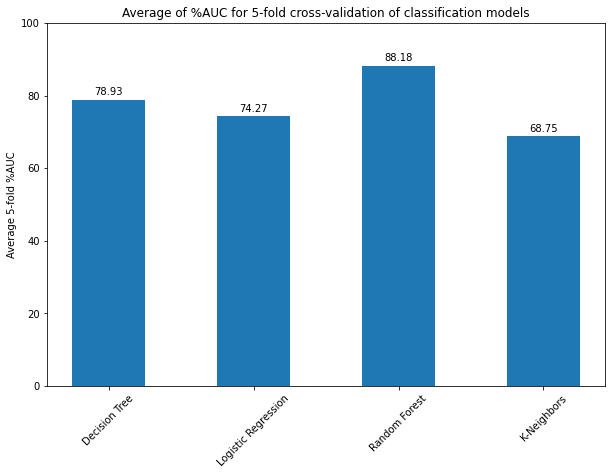

In [ ]:
Models_Results = {'Decision Tree': avg_AUC_DT,
                  'Logistic Regression': avg_AUC_LR,
                  'Random Forest': avg_AUC_RFC,
                  'K-Neighbors': baseline_AUC}

width = 0.5
fig, ax = plt.subplots(figsize=(10,8))
rects = ax.bar(Models_Results.keys(), np.round(list(Models_Results.values()), 4)*100, width)
plt.title('Average of %AUC for 5-fold cross-validation of classification models')
plt.ylabel('Average 5-fold %AUC')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.25)

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects, 'center')

plt.show()

# **Predicting default probability on test dataset**

In [ ]:
# import and prepare the test data 
data_test = pd.read_excel('/content/drive/MyDrive/Shakeel-Azhara/DSC2020_Test.xlsx', index_col='LoanID')
data_test[transform_str_list] = data_test[transform_str_list].astype(str)
data_test.replace(to_replace='nan', value=np.nan, inplace=True)
data_test = data_test.drop(columns=drop_cols)
data_test.head()

,Type,BEH_SCORE_AVG_A1,BEH_SCORE_AVG_A2,BEH_SCORE_MIN_A2,FHS_SCORE_AVG,FHS_SCORE_LATEST,CASH_FLOW_AMT,MTHS_SNC_1ST_REC_CNT,Managing_Sales_Office_Nbr,Postal_Code_L,A1_AVG_POS_SALDO_PROF_1_AMT,Invest_Amt,Original_loan_Amt,Product_Desc,CREDIT_TYPE_CD,ACCOUNT_PURPOSE_CD,A1_TOT_DEB_INTEREST_PROF_6_AMT,A2_MTHS_SNC_LAST_LIQ_PRIV_CNT,A2_MTHS_SNC_FIRST_COREPROF_CNT,A2_MARITAL_STATUS_CD,A1_TOT_DEB_INTEREST_PROF_1_AMT,MTHS_IN_BUSINESS_CNT,A2_MTHS_SNC_LAST_LIQ_SAVE_CNT,A1_NEGAT_TRANS_COREPROF_CNT,FINANCIAL_PRODUCT_TYPE_CD,A1_OVERDRAWN_DAYS_PROF_24_CNT,A1_OVERDRAWN_DAYS_PROF_6_CNT,A2_EMPLOYMENT_STATUS_CD,A1_AVG_NEG_SALDO_PROF_3_AMT,A1_AVG_POS_SALDO_PROF_12_AMT,A2_RESIDENT_STATUS_CD,A1_TOT_STND_PAYMNT_INT_PROF_CNT,CASHFLOW_MONTHLY_CREDIT_RT,MONTHS_SINCE_LAST_REFUSAL_CNT,MONTHLY_CREDIT_AMT_TOT,A2_ANNUAL_INCOME_AMT_scale,A2_AVG_NEG_SALDO_PRIV_12_AMT_scale,A2_AVG_POS_SALDO_SAVINGS_12_AMT_scale,A2_TOTAL_EMPLOYMENT_MONTHS_CNT_scale,Label_Default
LoanID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Company_Known,701.0,705.509472,705.509472,99.979423,99.984423,5330.0,170.0,502bb1fe,c2484906,6905.41,27685.95,33500.0,Car4Pro,IK,65,601.41,115.0,NaN,2,101.29,170.0,20.0,18.0,MTG,0.0,0.0,406,926.41,3216.32,1.0,1.0,9.546269,NaN,558.333333,0.007935,0.171879,-0.283450,2.564626,?
2,Company_Known,685.0,712.715611,712.715611,99.777002,99.489870,19076.0,380.0,828c2ee2,895c9c89,5836.19,130000.00,130000.0,Immo4Pro,IK,106,0.00,4.0,NaN,2,0.00,370.0,44.0,29.0,MTG,0.0,0.0,406,0.00,5761.16,0.0,5.0,26.412923,199.0,722.222222,-0.443644,-0.183191,0.576338,1.661988,?
3,Company_Known,685.0,712.715611,712.715611,99.777002,99.489870,19076.0,380.0,828c2ee2,895c9c89,5836.19,370000.00,370000.0,Immo4Pro,IK,306,0.00,4.0,NaN,2,0.00,370.0,44.0,29.0,MTG,0.0,0.0,406,0.00,5761.16,0.0,5.0,9.280216,199.0,2055.555556,-0.443644,-0.183191,0.576338,1.661988,?
4,Company_Known,NaN,664.222048,664.222048,99.990255,99.971242,17638.0,199.0,32007b1b,42d103b6,10746.52,20300.00,20300.0,Equipment4Pro,IK,99,0.00,NaN,469.0,2,0.00,222.0,11.0,24.0,MTG,0.0,0.0,357,0.00,13090.55,1.0,1.0,52.132020,NaN,338.333333,-0.836872,NaN,0.832216,0.207250,?
5,Company_Known,631.0,NaN,NaN,98.109661,98.109661,47016.0,27.0,NaN,NaN,0.00,NaN,NaN,NaN,KK,1,7724.33,51.0,NaN,2,1864.88,26.0,55.0,47.0,LON,13.0,13.0,410,19273.16,1047.15,1.0,1.0,NaN,40.0,NaN,0.615306,0.971658,-0.393422,2.345539,?


In [ ]:
# preprocessing the data, training on the whole 
X_train_full = pd.DataFrame(index=data_train.index)
X_test_full = pd.DataFrame(index=data_test.index)

# Handling missing values
pcnt_missing_all = (X.isna().sum()/X.shape[0])*100
pcnt_missing_num = (X[num_cols].isna().sum()/X.shape[0])*100
pcnt_missing_cat = (X[cat_cols].isna().sum()/X.shape[0])*100

for col in pcnt_missing_all.index:
  if pcnt_missing_all[col] >= 50 and pcnt_missing_all[col] < 90:
    X_train_full[col] = X[col].isna().astype(int)
    X_test_full[col] = data_test[col].isna().astype(int)

for col in pcnt_missing_num.index:
  if pcnt_missing_num[col] < 50:
    mean_value = X[col].mean()
    X_train_full[col] = X[col].fillna(value=mean_value)
    X_test_full[col] = data_test[col].fillna(value=mean_value)

for col in pcnt_missing_cat.index:
  if pcnt_missing_cat[col] < 50:
    freq_value = X[col].mode()[0]
    X_train_full[col] = X[col].fillna(value=freq_value)
    X_test_full[col] = data_test[col].fillna(value=freq_value)

# Preprocessing Categorical Variabes
cnt_unique = X_train_full.select_dtypes(include='object').nunique()

for col in cnt_unique[cnt_unique <= 10].index:
  X_train_full = X_train_full.join(pd.get_dummies(X[col], prefix=col[:5]))
  X_train_full.drop(columns=col, inplace=True)
  X_test_full = X_test_full.join(pd.get_dummies(data_test[col], prefix=col[:5]))
  X_test_full.drop(columns=col, inplace=True)

HCardinals = cnt_unique[cnt_unique > 10].index
for col in HCardinals: 
  X_test_full[col]= X.groupby(col)[col].transform('count')/X.shape[0]
  d = dict(zip(X[col], X_train_full[col]))
  for i in list(set(data_test[col].unique()) - set(X[col].unique())):
    d[i] = 0
  X_test_full[col] = data_test[col].replace(d)

In [ ]:
# training the RandomForestClassifier on the full training dataset

best_model = RandomForestClassifier(n_jobs=-1)
params = {'n_estimators': np.arange(350, 401, 10)}
CV = GridSearchCV(best_model, param_grid=params, cv=5, n_jobs=-1, scoring='roc_auc')
CV.fit(X_train_full, Y)

In [ ]:
CV.best_params_

{'n_estimators': 370}

In [ ]:
# making predictions on the preprocessed test dataset
predictions = CV.predict_proba(X_test_full)